CSCI 3104 Spring 2018

Problem Set 5

Merola, Michael

06/04/1998

# Problem Set 5
***

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

namedata_path = 'https://www2.census.gov/topics/genealogy/1990surnames/dist.all.last'

### Problem 1

(15 pts) Bellatrix Lestrange is writing a secret message to Voldemort and wants to
prevent it from being understood by meddlesome young wizards and Muggles. She
decides to use Huffman encoding to encode the message. Magically, the symbol frequencies
of the message are given by the Pell numbers, a famous sequence of integers
known since antiquity and related to the Fibonacci numbers. The nth Pell number is
defined as Pn = 2 Pn−1 + Pn−2 for n > 1 with base cases P0 = 0 and P1 = 1.

***

(a) For an alphabet of Σ = {a, b, c, d, e, f, g, h} with frequencies given by the first
|Σ| non-zero Pell numbers, give an optimal Huffman code and the corresponding
encoding tree for Bellatrix to use.


<img src="https://github.com/MichaelMerola/CSCI3104/blob/master/Homework-5/huffman.jpg?raw=true" style="width:300px;height:300px;transform:rotate(90deg)">

a = [0000000]

b = [0000001]

c = [000001]

d = [00001]

e = [0001]

f = [001]

g = [01]

h = [1]

***

(b) Generalize your answer to (1a) and give the structure of an optimal code when
the frequencies are the first n non-zero Pell numbers.

In [ ]:
for i in range(0, n)
    if (i == 1):
        #code = n-1 zeroes  (ex.. n=5 so 0000)
    else
        #code = n-i-1 zeroes + one (ex.. n=5 so 0001)

### Problem 2

(30 pts) A good hash function $h(x)$ behaves in practice very close to the uniform hashing
assumption analyzed in class, but is a deterministic function. That is, $h(x) = k$ each
time $x$ is used as an argument to $h(x)$. Designing good hash functions is hard, and a
bad hash function can cause a hash table to quickly exit the sparse loading regime by
overloading some buckets and under loading others. Good hash functions often rely
on beautiful and complicated insights from number theory, and have deep connections
to pseudorandom number generators and cryptographic functions. In practice, most
hash functions are moderate to poor approximations of uniform hashing.

Consider the following hash function. Let $U$ be the universe of strings composed of the
characters from the alphabet $\Sigma = [A, \dots ,Z]$, and let the function $f(x_i)$ return the index
of a letter $x_i \in \Sigma$, e.g., $f(A)=1$ and $f(Z)=26$. Finally, for an \textbf{m}-character string
$x \in \Sigma^m$, define $h(x)=([\sum_{i=1}^m f(x_i)] \ \text{mod} \ l)$, where $l$ is the number of buckets in the hash table. That is, our hash function sums up the index values of the characters of a
string $x$ and maps that value onto one of the $l$ buckets.

***

(a) The following list contains US Census derived last names:
    
http://www2.census.gov/topics/genealogy/1990surnames/dist.all.last

Using these names as input strings, first choose a uniformly random 50% of these
name strings and then hash them using $h(x)$.

Produce a histogram showing the corresponding distribution of hash locations
when $l = 200$. Label the axes of your figure. Briefly describe what the figure
shows about $h(x)$, and justify your results in terms of the behavior of $h(x)$. Do
not forget to append your code.

Hint: the raw file includes information other than name strings, which will need to be removed; and, think about how you can count hash locations without building or using a real hash table.


In [34]:
def hashNames(personName, num_bins):
    
    if (isinstance(personName,str) == False):
        return -1
    
    letters = {"A" : 1, "B" : 2, "C" : 3, "D" : 4, "E" : 5, "F" : 6, "G" : 7, "H" : 8, "I" : 9, "J" : 10, "K" : 11,
               "L" : 12, "M" : 13, "N" : 14, "O" : 15, "P" : 16, "Q" : 17, "R" : 18, "S" : 19, "T" : 20, "U" : 21,
               "V" : 22, "W" : 23, "X" : 24, "Y" : 25, "Z" : 26}
    bins = num_bins
    sumHash = 0
    
    for i in personName:
        sumHash = sumHash + letters[i] 
        
    return sumHash%bins
    

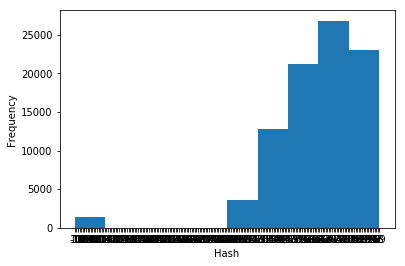

In [37]:

dfNames = pd.read_csv(namedata_path, delim_whitespace=True,header=None,usecols=[0])
dfNames_sample = dfNames.sample(frac=0.5) #sample random 50% of names
dfNames_sample.head()

names = list(dfNames[0])
hashed_names = np.array(names)
l = 200 #number of bins

for i in range(0, len(names)):
    hashed_names[i] = hashNames(names[i], l) 
    
plt.hist(hashed_names)

plt.xlabel("Hash")
plt.ylabel("Frequency")

plt.show()


(b) Enumerate at least 4 reasons why h(x) is a bad hash function relative to the ideal
behavior of uniform hashing.

1) The distribution of hashes across the bins are not distributed uniformly, but instead are left-skewed.

2) Names that contain the same letters but in different orders will be hashed at the same value

3) This function doesn't assign names to a very large amount of bins in the center of the distribution

4) Because of the numerous collisions in the hash table, it will be impossible to find most values without implementing another data structure like a linked-list at each hash. Due to this, accessing elements will be inefficient. It would be ideal to have much less collisions.

***

(c) Produce a plot showing (i) the length of the longest chain (were we to use chaining for resolving collisions) as a function of the number $n$ of these strings that we hash
into a table with $l = 200$ buckets, and (ii) the exact upper bound on the depth
of a red-black tree with $n$ items stored.

Then, (i) comment on the value of $n$ at which the red-black tree becomes a more
efficient data structure, and (ii) state the length of the longest chain when every
bucket has at least one hash hit.

In [ ]:
# I don't know

### Problem 3



(15 pts) Draco Malfoy is struggling with the problem of making change for $n$ cents
using the smallest number of coins. Malfoy has coin values of $v_1 < v_2 < \dots < v_r $ for r
coins types, where each coin’s value $v_i$ is a positive integer. His goal is to obtain a set
of counts $\{ d_i \}$, one for each coin type, such that $\sum_{i=1}^r d_i=k$ and where $k$ is minimized.

***

(a) A greedy algorithm for making change is the cashier’s algorithm, which all
young wizards learn. Malfoy writes the following pseudocode on the whiteboard
to illustrate it, where n is the amount of money to make change for and v is a
vector of the coin denominations:

In [ ]:
def wizardChange(n,v,r) :
    d[1 .. r] = 0 #initial histogram of coin types in solution
    while (n > 0) :
        k = 1
        while ( k < r and v[k] > n ):
            k++
            
        if k==r :
            return "no solution" 
        else : 
            n = n - v[k] 
        
    return d

Hermione snorts and says Malfoy’s code has bugs. Identify the bugs and explain
why each would cause the algorithm to fail.

**Bugs:**

    1 // while ( k < r and v[k] > n ): //
    2 // if k==r : return "no solution" //
    3 // d array is never updated //
    
**Explanation**

1) The while condition schould instead check that (v[k] <= n) which will check that the denomination of coin is less than the total number of change. The while loop wil then continue until the denomination is greater than the coin.

2) k being at the same values of r should still run the same function in the else statement, so we should remove the if/else statement and just have "n = n - v[k] "

3) We need to update the d array in the loop before returning it at the end of the function

***

(b) Sometimes the goblins at Gringotts Wizarding Bank run out of coins, and make
change using whatever is left on hand. Identify a set of U.S. coin denominations
for which the greedy algorithm does not yield an optimal solution. Justify your answer in terms of optimal substructure and the greedy-choice property. (The set should include a penny so that there is a solution for every value of n.)



Denominations: [1, 10, 25]

The greedy algorithm would not yield the optimal solution if the goblin had to make change for 80 cents.

Greedy:  25+25+25+[1+1+1+1+1] == 8 coins
Optimal: 25+25+[10+10+10] == 5 coins

***


(8 pts extra credit) On the advice of computer scientists, Gringotts has announced that they will be changing all wizard coin denominations into a new set of coins denominated in powers of $c$, i.e., denominations of $c_0$, $c_1$, $\dots$, $c^l$ for some integers $c > 1$ and $l \ge 1$. (This will be done by a spell that will magically transmute old
coins into new coins, before your very eyes.) Prove that the cashier’s algorithm will always yield an optimal solution in this case.

_Prove the cashier's algorithm is correctly yielding an optimal solution for n coins using loop invariant_

**Invariant:** n coins can always be solved with $c_n$ coins

**Initialization:** n=1 which could be solved optimally by using 1 coin

**Maintenance:**    1 < n < l where l coins can be solved by $c_l$ coins

**Termination:**    n = l which can be solved by using l coins


# Sources
***
### People
Krish Dholakiya

Gustav Solis

***